# Modeling
This notebook contains the modeling code for asthma, and predicting asthma from smoke

## Import Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import pearsonr

## Loading the Data

In [81]:
smoke_cleaned = pd.read_csv('../data_clean/norman_wildfires_SI_yearly_average.csv')
yearly_smoke_estimate_df = smoke_cleaned[['Year', 'Smoke_Estimate']]
yearly_smoke_estimate_df.set_index('Year', inplace=True)

asthma_survey_cleaned = pd.read_csv('../data_clean/asthma_survey_cleaned.csv')
yearly_asthma_df = asthma_survey_cleaned[['Year', 'Percentage']]
yearly_asthma_df.set_index('Year', inplace=True)

non_smoker_asthma_survey_cleaned = pd.read_csv('../data_clean/asthma_non-smoker_survey_cleaned.csv')
yearly_non_smoker_asthma_df = non_smoker_asthma_survey_cleaned[['Year', 'Percentage']]
yearly_non_smoker_asthma_df.set_index('Year', inplace=True)

smoking_survey_cleaned = pd.read_csv('../data_clean/smoking_survey_cleaned.csv')
smoking_survey_df = smoking_survey_cleaned[['Year', 'Smoking-Yes']]
smoking_survey_df.set_index('Year', inplace=True)

## EDA for Smoke Estimate vs Smoking

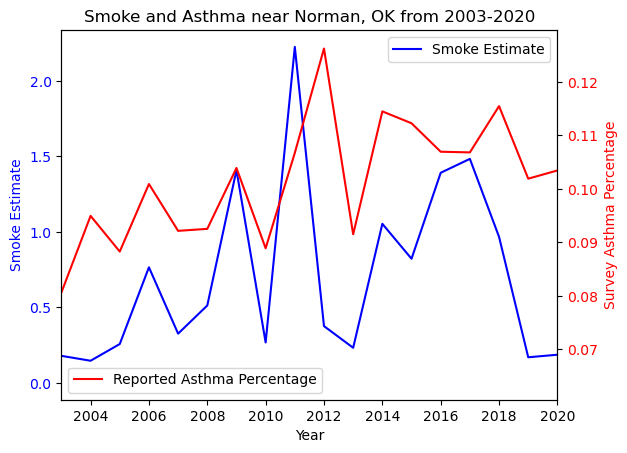

In [7]:
# Define subplots so we can plot on top of each other
fig, ax_si = plt.subplots()

#Plot the smoke estimate
ax_si.plot(smoke_cleaned['Year'].astype(int), smoke_cleaned['Smoke_Estimate'], color='blue', label='Smoke Estimate')
ax_si.set_xlabel("Year")
ax_si.set_ylabel("Smoke Estimate", color='blue')
ax_si.tick_params(axis="y", labelcolor="blue")
ax_si.legend()

# Plot the AQI estimate
ax_aqi = ax_si.twinx()
ax_aqi.plot(asthma_survey_cleaned['Year'].astype(int), asthma_survey_cleaned['Percentage'], color='red', label='Reported Asthma Percentage')
ax_aqi.set_ylabel("Survey Asthma Percentage", color='red')
ax_aqi.tick_params(axis="y", labelcolor="red")
ax_aqi.legend()

plt.xlim([2003, 2020])
plt.title("Smoke and Asthma near Norman, OK from 2003-2020")
plt.show()

## Same but for the non-Smoker

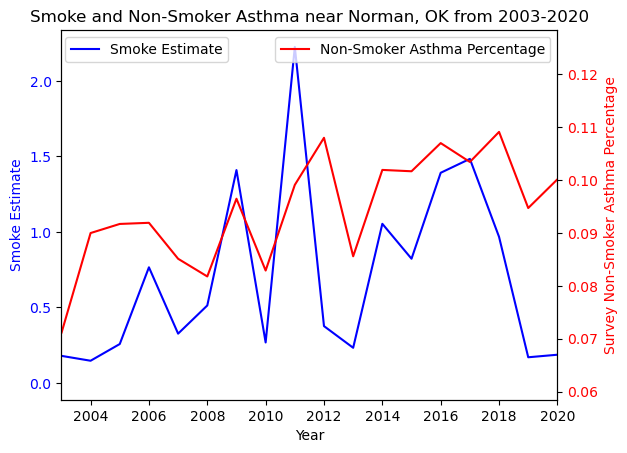

In [72]:
# Define subplots so we can plot on top of each other
fig, ax_si = plt.subplots()

#Plot the smoke estimate
ax_si.plot(smoke_cleaned['Year'].astype(int), smoke_cleaned['Smoke_Estimate'], color='blue', label='Smoke Estimate')
ax_si.set_xlabel("Year")
ax_si.set_ylabel("Smoke Estimate", color='blue')
ax_si.tick_params(axis="y", labelcolor="blue")
ax_si.legend(loc='upper right', bbox_to_anchor=(0.35, 1))

# Plot the AQI estimate
ax_aqi = ax_si.twinx()
ax_aqi.plot(non_smoker_asthma_survey_cleaned['Year'].astype(int), non_smoker_asthma_survey_cleaned['Percentage'], color='red', label='Non-Smoker Asthma Percentage')
ax_aqi.set_ylabel("Survey Non-Smoker Asthma Percentage", color='red')
ax_aqi.tick_params(axis="y", labelcolor="red")
ax_aqi.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.xlim([2003, 2020])
plt.title("Smoke and Non-Smoker Asthma near Norman, OK from 2003-2020")
plt.show()

## Linear Regression: Smoke Estimate vs Non-Smoker Asthma

c:\Users\ajnet\anaconda3\envs\DATA557\lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     5.810
Date:                Tue, 26 Nov 2024   Prob (F-statistic):             0.0283
Time:                        14:49:27   Log-Likelihood:                 59.944
No. Observations:                  18   AIC:                            -115.9
Df Residuals:                      16   BIC:                            -114.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0882      0.003     25.875      0.0

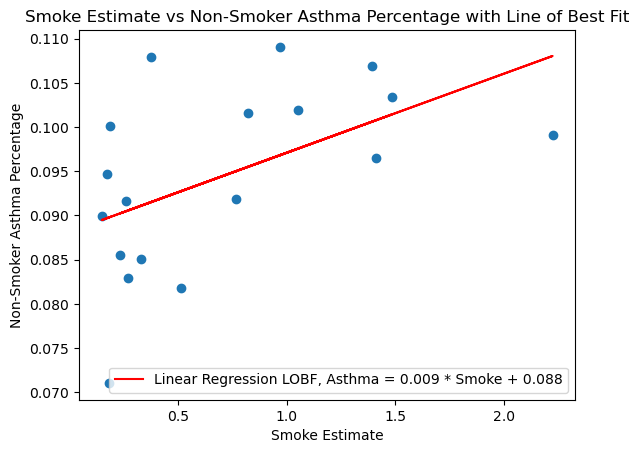

In [75]:
smoke_cleaned_02_20 = smoke_cleaned[smoke_cleaned['Year'].between(2003, 2020)]
non_smoker_asthma_survey_cleaned_02_20 = non_smoker_asthma_survey_cleaned[non_smoker_asthma_survey_cleaned['Year'].between(2003, 2020)]

# Convert to numpy and normalize feature vector
smoke = np.array(smoke_cleaned_02_20['Smoke_Estimate'])
non_smoker_asthma = np.array(non_smoker_asthma_survey_cleaned_02_20['Percentage'])

# Fit a SLR model
non_smoker_asthma_model_smoke = sm.OLS(non_smoker_asthma, sm.add_constant(smoke)).fit()
print(non_smoker_asthma_model_smoke.summary())
non_smoker_asthma_preds_fit = non_smoker_asthma_model_smoke.get_prediction(sm.add_constant(smoke)).predicted_mean

plt.scatter(smoke, non_smoker_asthma)
plt.plot(smoke, non_smoker_asthma_preds_fit, color='r', label=f'Linear Regression LOBF, Asthma = {non_smoker_asthma_model_smoke.params[1]:.3f} * Smoke + {non_smoker_asthma_model_smoke.params[0]:.3f}')
plt.xlabel('Smoke Estimate')
plt.ylabel('Non-Smoker Asthma Percentage')
plt.title('Smoke Estimate vs Non-Smoker Asthma Percentage with Line of Best Fit')
plt.legend()

corr, p_value = pearsonr(smoke, non_smoker_asthma)

print("Pearson Correlation Coefficient:", corr)
print("P-value:", p_value)

print(non_smoker_asthma_model_smoke.params[0])

## Linear Regression: Smoke Estimate vs Asthma

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     4.167
Date:                Tue, 26 Nov 2024   Prob (F-statistic):             0.0581
Time:                        13:46:40   Log-Likelihood:                 57.358
No. Observations:                  18   AIC:                            -110.7
Df Residuals:                      16   BIC:                            -108.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0954      0.004     24.243      0.0

c:\Users\ajnet\anaconda3\envs\DATA557\lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


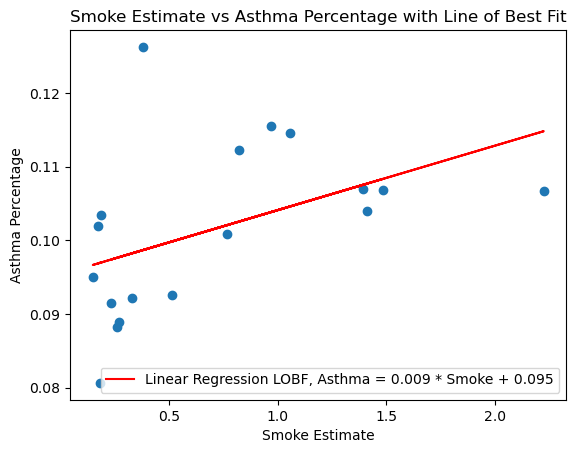

In [ ]:
smoke_cleaned_02_20 = smoke_cleaned[smoke_cleaned['Year'].between(2003, 2020)]
asthma_survey_cleaned_02_20 = asthma_survey_cleaned[asthma_survey_cleaned['Year'].between(2003, 2020)]

# Convert to numpy and normalize feature vector
smoke = np.array(smoke_cleaned_02_20['Smoke_Estimate'])
asthma = np.array(asthma_survey_cleaned_02_20['Percentage'])

# Fit a SLR model
asthma_model_smoke = sm.OLS(asthma, sm.add_constant(smoke)).fit()
print(asthma_model_smoke.summary())
asthma_preds_fit = asthma_model_smoke.get_prediction(sm.add_constant(smoke)).predicted_mean

plt.scatter(smoke, asthma)
plt.plot(smoke, asthma_preds_fit, color='r', label=f'Linear Regression LOBF, Asthma = {asthma_model_smoke.params[1]:.3f} * Smoke + {asthma_model_smoke.params[0]:.3f}')
plt.xlabel('Smoke Estimate')
plt.ylabel('Asthma Percentage')
plt.title('Smoke Estimate vs Asthma Percentage with Line of Best Fit')
plt.legend()

corr, p_value = spearmanr(smoke, asthma)

print("Spearman Correlation Coefficient:", corr)
print("P-value:", p_value)

print(asthma_model_smoke.params[0])

## Linear Regression: Smoking vs Asthma

c:\Users\ajnet\anaconda3\envs\DATA557\lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.2561
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.620
Time:                        13:47:41   Log-Likelihood:                 55.418
No. Observations:                  18   AIC:                            -106.8
Df Residuals:                      16   BIC:                            -105.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1099      0.017      6.568      0.0

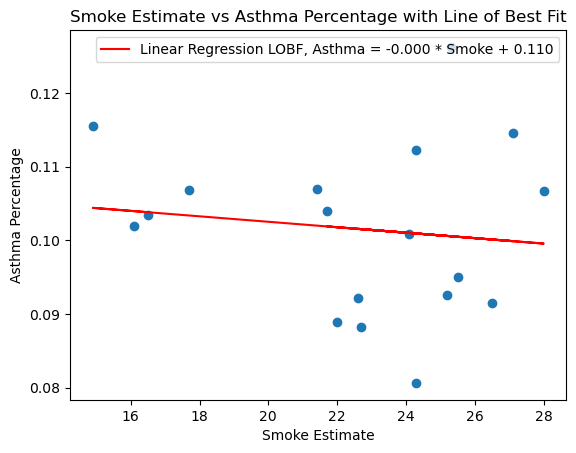

In [54]:
smoking_cleaned_02_20 = smoking_survey_cleaned[smoking_survey_cleaned['Year'].between(2003, 2020)]

# Convert to numpy
smoking = np.array(smoking_cleaned_02_20['Smoking-Yes'])

# Fit a SLR model
asthma_model_smoking = sm.OLS(asthma, sm.add_constant(smoking)).fit()
print(asthma_model_smoking.summary())
asthma_preds_fit = asthma_model_smoking.get_prediction(sm.add_constant(smoking)).predicted_mean

plt.scatter(smoking, asthma)
plt.plot(smoking, asthma_preds_fit, color='r', label=f'Linear Regression LOBF, Asthma = {asthma_model_smoking.params[1]:.3f} * Smoke + {asthma_model_smoking.params[0]:.3f}')
plt.xlabel('Smoke Estimate')
plt.ylabel('Asthma Percentage')
plt.title('Smoke Estimate vs Asthma Percentage with Line of Best Fit')
plt.legend()

corr, p_value = spearmanr(smoking, asthma)

print("Spearman Correlation Coefficient:", corr)
print("P-value:", p_value)

## Multiple Linear Regression: Smoking + Smoke Estimate vs Asthma

In [56]:
# X input
MLR_input = np.column_stack((smoke, smoking))

# Fit a MLR model
asthma_model_MLR = sm.OLS(asthma, sm.add_constant(MLR_input)).fit()
print(asthma_model_MLR.summary())
asthma_preds_fit = asthma_model_MLR.get_prediction(sm.add_constant(MLR_input)).predicted_mean


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     2.313
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.133
Time:                        13:51:30   Log-Likelihood:                 57.694
No. Observations:                  18   AIC:                            -109.4
Df Residuals:                      15   BIC:                            -106.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1065      0.015      6.956      0.0

c:\Users\ajnet\anaconda3\envs\DATA557\lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


## Read in the smoke estimate predictions

In [91]:
smoke_estimate_preds_2025_2050 = pd.read_csv("../data_clean/forecasted_smoke_estimate.csv")

In [ ]:
smoke_estimates_2025_2050 = np.array(smoke_estimate_preds_2025_2050["Smoke_Estimate"])

non_smoker_asthma_preds_fit_2025_2050_fit = non_smoker_asthma_model_smoke.get_prediction(sm.add_constant(smoke_estimates_2025_2050))
non_smoker_asthma_preds_fit_2025_2050 = non_smoker_asthma_preds_fit_2025_2050_fit.predicted_mean

upper_bound_nsapf_fit = non_smoker_asthma_model_smoke.get_prediction(sm.add_constant(np.array(smoke_estimate_preds_2025_2050["Upper_bound"])))
upper_upper_bound_nsapf = upper_bound_nsapf_fit.conf_int()[:, 1]
upper_bound_nsapf = upper_bound_nsapf_fit.predicted_mean

lower_bound_nsapf_fit = non_smoker_asthma_model_smoke.get_prediction(sm.add_constant(np.array(smoke_estimate_preds_2025_2050["Lower_bound"])))
lower_lower_bound_nsapf = lower_bound_nsapf_fit.conf_int()[:, 0]
lower_bound_nsapf = lower_bound_nsapf_fit.predicted_mean



In [ ]:
stdevs_nsa_preds = (non_smoker_asthma_preds_fit_2025_2050_fit.conf_int()[:, 1] - non_smoker_asthma_preds_fit_2025_2050_fit.conf_int()[:, 0])/2
zscore_nsa_preds = (non_smoker_asthma_preds_fit_2025_2050  - np.mean(non_smoker_asthma_preds_fit_2025_2050)) / stdevs_nsa_preds

## Plot asthma predictions

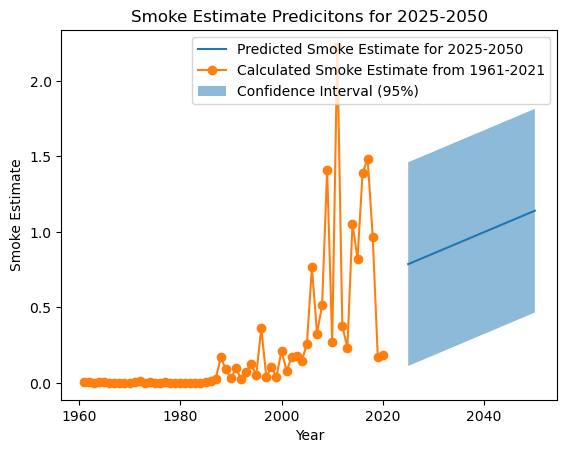

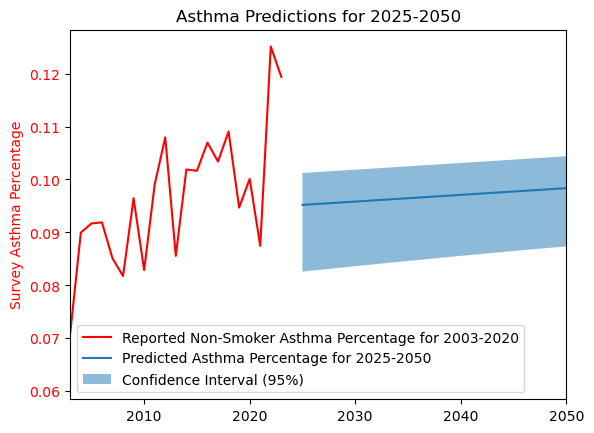

In [112]:
plt.plot(smoke_estimate_preds_2025_2050['Year'], smoke_estimate_preds_2025_2050['Smoke_Estimate'], label='Predicted Smoke Estimate for 2025-2050')
plt.plot(yearly_smoke_estimate_df.index, yearly_smoke_estimate_df['Smoke_Estimate'], marker = 'o', label='Calculated Smoke Estimate from 1961-2021')
plt.fill_between(smoke_estimate_preds_2025_2050['Year'], smoke_estimate_preds_2025_2050['Upper_bound'], smoke_estimate_preds_2025_2050['Lower_bound'], alpha=0.5, label='Confidence Interval (95%)')
plt.title(f"Smoke Estimate Predicitons for 2025-2050")
plt.xlabel("Year")
plt.ylabel(f"Smoke Estimate")
plt.legend()
plt.show()


plt.plot(non_smoker_asthma_survey_cleaned['Year'].astype(int), non_smoker_asthma_survey_cleaned['Percentage'], color='red', label='Reported Non-Smoker Asthma Percentage for 2003-2020')
plt.plot(smoke_estimate_preds_2025_2050['Year'], non_smoker_asthma_preds_fit_2025_2050, label='Predicted Asthma Percentage for 2025-2050')
plt.fill_between(smoke_estimate_preds_2025_2050['Year'], upper_bound_nsapf, lower_bound_nsapf, alpha=0.5, label='Confidence Interval (95%)')
plt.ylabel("Survey Asthma Percentage", color='red')
plt.tick_params(axis="y", labelcolor="red")
plt.legend()

plt.xlim([2003, 2050])
plt.title("Asthma Predictions for 2025-2050")
plt.show()